# Data Wrangling

## Gather

In this section, data will be necessary for the execution of the project. Data will mainly be gathered from three sources, which includes through:
- A csv file
- A website by using request library, and;
- An tweepy API

In [104]:
#import packages necessary for the execution of the project
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sb

>> Below, archived tweets are converted into pandas data frame. 

In [3]:
#convert archived tweets into a pandas dataframe
archived_tweets = pd.read_csv('twitter-archive-enhanced.csv')

>> In the cell below, we programmatically download image predictions of dogs in tsv format from Udacity servers. This will be done using the request library. 

In [4]:
# Using requests library to download tsv file from Udacity website
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

# Predictions are converted into DataFrames   
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')   

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

>> In the cells below, our tweets saved in a JSON file are looped over and saved in a lists. They are then converted into pandas DataFrame for ease of use.

In [5]:
# Looping over our tweets and saving them in a list
tweets_details = []

tweet_json = open('tweet_json.txt', "r")

for line in tweet_json:
    try:
        tweet = json.loads(line)
        tweets_details.append(tweet)
    except:
        continue
        
tweet_json.close()

In [6]:
# Converting our list into DataFrames 
tweets_details = pd.DataFrame(tweets_details)

## Assess

##### Archived Tweets

In [7]:
# summary view of top tweets
archived_tweets.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336000,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343000,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084000,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858000,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688000,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897000,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991000,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237000,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312000,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198000,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# summary view of top tweets
archived_tweets.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
778,775898661951791000,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1473,693647888581312000,NaN,NaN,2016-01-31 04:11:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a pic without a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693647888...,7,10,None,None,None,None,None
1377,701601587219795000,NaN,NaN,2016-02-22 02:57:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coopson. He's a Blingin Schnitzel. Bui...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701601587...,10,10,Coopson,None,None,None,None
2070,671122204919246000,NaN,NaN,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two miniature golden retrievers here. Webbed p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671122204...,4,10,None,None,None,None,None
553,804026241225523000,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
1561,688385280030670000,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's takes top-notch selfies. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688385280...,12,10,Louis,None,None,None,None
322,834167344700198000,NaN,NaN,2017-02-21 22:26:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunshine. She doesn't believe in perso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834167344...,11,10,Sunshine,None,None,None,None
1131,728986383096946000,NaN,NaN,2016-05-07 16:34:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Puff. He started out on the streets (f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,None,None,None,None
430,821044531881721000,NaN,NaN,2017-01-16 17:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flash. He went way too hard celebratin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821044531...,12,10,Flash,None,None,None,None
909,757725642876129000,NaN,NaN,2016-07-25 23:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beckham. He fell asleep at the wheel. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757725642...,11,10,Beckham,None,None,None,None


In [9]:
# summary view of bottom tweets
archived_tweets.tail(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2326,666411507551481000,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
2327,666407126856765000,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,None,None,None,None
2328,666396247373291000,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None
2329,666373753744588000,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2330,666362758909284000,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
2331,666353288456101000,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None,None,None,None
2332,666345417576210000,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
2333,666337882303524000,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2334,666293911632134000,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None
2335,666287406224695000,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


>> In the above cells, we can see that under the name column, we have missing values represented with "None". We also notice that the name column is mixed in lower case and upper case. Similarly, some names are simply represented as 'a', 'an', etc.

In [10]:
# We take specific look at rows with names in lower case and match them to rows in the text column with words like "named". 
#This will be used to determine if there is an actual dog name in the text.
archived_tweets.loc[(archived_tweets['name'].str.islower()) & (archived_tweets['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788000,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334000,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421000,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960000,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466000,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563000,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108000,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657000,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722000,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
2191,668955713004314000,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None


In [11]:
# We take specific look at rows with names in lower case and match them to rows in the text column with words like "name". 
#This will be used to determine if there is an actual dog name in the text.
archived_tweets.loc[(archived_tweets['name'].str.islower()) & (archived_tweets['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590000,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297000,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [12]:
archived_tweets.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [13]:
# View rows with '&amp' in the text column. 
archived_tweets.loc[archived_tweets['text'].str.contains('&amp')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449000,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638000,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591000,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801000,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463000,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424000,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874000,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743000,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526000,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


In [14]:
# determining the summary statistics of the data
archived_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455128e+17,2.015385e+16,7.720400e+17,1.241437e+16,13.126486,10.455433
std,6.856705e+16,7.583419e+16,1.253546e+17,6.236928e+16,9.597227e+16,45.876648,6.745237
min,6.660209e+17,6.660000e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.760000e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.035000e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.260000e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.860000e+17,8.410000e+17,8.874740e+17,7.870000e+17,1776.000000,170.000000


In [15]:
# Looking at columns, count of values and data types
archived_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# Identiying columns with null values
archived_tweets.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# Getting the number of rows and columns of the dataframe
archived_tweets.shape

(2356, 17)

##### Image Prediction

In [18]:
# Brief output of first 5 image predictions
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Brief output of 5 samples of the image predictions
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
937,703611486317502464,https://pbs.twimg.com/media/CcO66OjXEAASXmH.jpg,1,Pembroke,0.756441,True,basenji,0.126621,True,Cardigan,0.080117,True
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


In [20]:
# Brief output of 5 samples of the image predictions
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
# determining the summary statistics of the image_predictions dataset
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# Looking at columns, count of values and data types
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#Determine the number of rows and columns in the dataset
image_predictions.shape

(2075, 12)

##### Tweet Details

In [24]:
#Brief view of the dataset's top 5 rows
tweets_details.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39370,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33698,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25394,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42743,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,40904,False,False,False,False,en,NaN,NaN,NaN,NaN


In [25]:
# A random sample of the dataset
tweets_details.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
608,Fri Nov 11 00:03:42 +0000 2016,796865951799083009,796865951799083009,This is Tyr. He's just checking on you. Nifty ...,False,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 796865939568373760, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8505,False,False,False,False,en,NaN,NaN,NaN,NaN
1832,Sun Dec 13 04:40:46 +0000 2015,675898130735476737,675898130735476737,I'm sure you've all seen this pupper. Not prep...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675898073508421632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1760,False,False,False,False,en,NaN,NaN,NaN,NaN
129,Tue May 23 16:16:06 +0000 2017,867051520902168576,867051520902168576,"Oh my this spooked me up. We only rate dogs, n...",False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 867051512509460480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33191,False,False,False,False,en,NaN,NaN,NaN,NaN
65,Mon Jun 26 19:07:24 +0000 2017,879415818425184262,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 879415784908390401, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,107488,False,False,False,False,en,NaN,NaN,NaN,NaN
2018,Wed Dec 02 03:20:45 +0000 2015,671891728106971137,671891728106971137,This is Mojo. Apparently he's too cute for a s...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671891721769385984, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1401,False,False,False,False,en,NaN,NaN,NaN,NaN


In [26]:
#A brief view from the bottom of the dataset
tweets_details.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2345,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2346,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,307,False,False,False,False,en,NaN,NaN,NaN,NaN
2347,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2348,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN
2349,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2528,False,False,False,False,en,NaN,NaN,NaN,NaN


>>From the tweets extract above, of notable interest is the source column. Below, we will count the number of entries from each column.

In [27]:
# count of tweets sources
tweets_details.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2215
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
# determining the summary statistics of the image_predictions dataset
tweets_details.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.350000e+03,7.800000e+01,7.800000e+01,2350.000000,2350.000000,2.900000e+01
mean,7.425233e+17,7.455079e+17,2.014171e+16,3104.064681,8110.702553,8.162686e+17
std,6.844886e+16,7.582492e+16,1.252797e+17,5138.133282,12033.993390,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783910e+17,6.757419e+17,3.086374e+08,617.000000,1418.000000,7.888183e+17
50%,7.193360e+17,7.038708e+17,4.196984e+09,1447.500000,3589.000000,8.340867e+17
75%,7.989319e+17,8.257804e+17,4.196984e+09,3612.250000,10108.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,78839.000000,131922.000000,8.860534e+17


In [29]:
# determining the summary statistics of the image_predictions dataset
tweets_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2350 non-null   object 
 1   id                             2350 non-null   int64  
 2   id_str                         2350 non-null   object 
 3   full_text                      2350 non-null   object 
 4   truncated                      2350 non-null   bool   
 5   display_text_range             2350 non-null   object 
 6   entities                       2350 non-null   object 
 7   extended_entities              2071 non-null   object 
 8   source                         2350 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### 8 Quality Issues detected in the dataset.
 
<ol>
<li>The dog names columns are mixed in lower and title case in the twitter archive dataset.
<li>The content of the text column is cut short.
<li>Some tweets in the text column have '&amp' instead of '&'  in the twitter archive dataset.
  <li>Removing retweet status related rows.
 <li>Some columns are irrelevant and will be dropped (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id_x, in_reply_to_user_id_x, in_reply_to_status_id_y, in_reply_to_status_id_str, in_reply_to_user_id_y, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status).
  <li>The expanded_urls column has some missing rows.   
 <li>Some of the dog categories are captured in the text column.
 <li>Timestamp in the twitter archive dataset is in object datatype.
<li>Columns p1,p2, & p3 of the image_prediction data set have mixed entries in upper case and lower case.
 <li>The source column in the tweets_details dataset is not clear.

  
</ol>
 

#### 2 Tidiness issues detected in the dataset.

<ol>
<li>The 3 datasets should be joined to 1.
<li>The 4 categories of dog in the archived_tweets dataset can be combined to a single column.
</ol>

## Clean

>> Before we begin cleaning our dataset, it is good practice to create copies of the dataset.

In [36]:
# copies of the dataset will be created for us to work with
archived_tweets_clean = archived_tweets.copy()
image_predictions_clean = image_predictions.copy()
tweets_details_clean = tweets_details.copy()

In [37]:
# datasets are saved to csv files
archived_tweets_clean.to_csv('archive_clean.csv',encoding='utf-8',index=False)
image_predictions_clean.to_csv('image_clean.csv',encoding='utf-8',index=False)
tweets_details_clean.to_csv('tweets_clean1.csv',encoding='utf-8',index=False)

In [38]:
# datasets saved above will made to dataframes
archived_tweets_clean = pd.read_csv('archive_clean.csv')
image_predictions_clean = pd.read_csv('image_clean.csv')
tweets_details_clean = pd.read_csv('tweets_clean1.csv')

In [39]:
#id column in the tweets_details_clean dataset is renamed to 'tweet_id' for easy merging
tweets_details_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [41]:
#sorting the tweet_id column in descending order to match the other datasets
image_predictions_clean = image_predictions_clean.sort_values('tweet_id', ascending = False)

In [42]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336000,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2073,892177421306343000,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Define

<b>The 3 datasets should be joined to 1.</b>

We will join the three dataset into a single dataset. This will make cleaning the dataset easy and more efficient.

#### Code

In [49]:
# reduce function imported to merge datasets easily
from functools import reduce

In [50]:
# datasets are saved in a list
dfs = [archived_tweets_clean, tweets_details_clean,image_predictions_clean,]

In [51]:
# datasets are merged
tweets_master_data = reduce(lambda left,right: pd.merge(left,right,on=['tweet_id'], how='left'),dfs)

In [52]:
#increase the number of visible columns
pd.set_option("display.max_columns",30)

#### Test

In [53]:
#testing to make sure our merge was successful
tweets_master_data.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336000,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343000,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084000,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858000,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688000,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define

<ul>
        <li>The 4 categories of dog in the archived_tweets dataset can be combined to a single column.
        <li>Some of the dog categories are captured in the text column.
    </ul>


The four categories of dogs will be merged to one.

In [54]:
# merging the four columns 'doggo', 'floofer', 'pupper', 'puppo' to one.
tweets_master_data ['dog_categories'] = (tweets_master_data ['doggo'] != 'None') + (tweets_master_data ['floofer'] != 'None') + (tweets_master_data ['pupper'] != 'None') + (tweets_master_data ['puppo'] != 'None')

In [55]:
# Extract dog categories contained in the text column into the dog_categories
tweets_master_data ['dog_categories'] = tweets_master_data ['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [56]:
#drop columns that have been merged
columns = ['doggo', 'floofer', 'pupper', 'puppo']
tweets_master_data = tweets_master_data.drop(columns, axis=1)

#### Test

In [57]:
#testing to make sure our merge was successful
tweets_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2356 non-null   int64  
 1   in_reply_to_status_id_x        78 non-null     float64
 2   in_reply_to_user_id_x          78 non-null     float64
 3   timestamp                      2356 non-null   object 
 4   source_x                       2356 non-null   object 
 5   text                           2356 non-null   object 
 6   retweeted_status_id            181 non-null    float64
 7   retweeted_status_user_id       181 non-null    float64
 8   retweeted_status_timestamp     181 non-null    object 
 9   expanded_urls                  2297 non-null   object 
 10  rating_numerator               2356 non-null   int64  
 11  rating_denominator             2356 non-null   int64  
 12  name                           2356 non-null   o

#### Define
> The dog names column is mixed in lower and title case in the twitter archive dataset.

Some of dog names are captured in lowercase. They will all be converted to title case to ensure uniformity.

In [58]:
# converting names in lower case to title case
tweets_master_data['name'] = tweets_master_data['name'].str.title() 

#### Test

In [59]:
#testing to see if our fix was successful
tweets_master_data['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           A
2353           A
2354           A
2355        None
Name: name, Length: 2356, dtype: object

#### Define
> The content of the text column is cut short

In [60]:
#the text column will expanded to display full text
pd.set_option('display.max_colwidth', None)

#### Test

In [61]:
#testing to see if the text fully displays
tweets_master_data['text']

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

#### Define

> Some tweets in the text column have '&amp' instead of '&'  in the twitter archive dataset.

In [62]:
# replacing '&amp' with '&'
tweets_master_data['text'] = tweets_master_data['text'].str.replace('&amp;', '&')

#### Test

In [63]:
# testing to see if the replacement has taken effect 
tweets_master_data[tweets_master_data.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,created_at,id_str,...,quoted_status_id,quoted_status_id_str,quoted_status,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_categories


#### Define

>  Removing retweet status related rows.

In [64]:
#we will remove rows related to retweet status

tweets_master_data = tweets_master_data[tweets_master_data.retweeted_status_id.isnull()]
tweets_master_data = tweets_master_data[tweets_master_data.retweeted_status_user_id.isnull()]
tweets_master_data = tweets_master_data[tweets_master_data.retweeted_status_timestamp.isnull()]

#### Test

In [72]:
# testing to make sure the null values have been deleted
tweets_master_data[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   retweeted_status_id         0 non-null      float64
 1   retweeted_status_user_id    0 non-null      float64
 2   retweeted_status_timestamp  0 non-null      object 
dtypes: float64(2), object(1)
memory usage: 68.0+ KB


#### Define

> The following columns are irrelevant and will be dropped: <i>retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id_x, in_reply_to_user_id_x, in_reply_to_status_id_y, in_reply_to_status_id_str, in_reply_to_user_id_y, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status.</i> These columns will be dropped because they lack significant data in them to aid our analysis.

In [73]:
# the irrelevant columns will be captured in a variable
irrelevant_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x', 
                                          'in_reply_to_status_id_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
                                          'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status']

#the columns will be dropped
tweets_master_data.drop(irrelevant_columns, axis=1, inplace=True)

#### Test

In [74]:
# testing to see if the columns were dropped successfully
tweets_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2175 non-null   int64  
 1   timestamp                      2175 non-null   object 
 2   source_x                       2175 non-null   object 
 3   text                           2175 non-null   object 
 4   expanded_urls                  2117 non-null   object 
 5   rating_numerator               2175 non-null   int64  
 6   rating_denominator             2175 non-null   int64  
 7   name                           2175 non-null   object 
 8   created_at                     2175 non-null   object 
 9   id_str                         2175 non-null   float64
 10  full_text                      2175 non-null   object 
 11  truncated                      2175 non-null   object 
 12  display_text_range             2175 non-null   o

#### Define

> The expanded_urls column has some missing rows. The rows without the urls will be dropped.

In [75]:
#dropping rows without urls
tweets_master_data = tweets_master_data.dropna(subset=['expanded_urls'])

#### Test

In [76]:
#testing to see if the rows were successfully dropped
tweets_master_data['expanded_urls'].isnull().sum()

0

#### Define

> Timestamp in the twitter archive dataset is in object datatype. This will be treated in the merged dataset. The timestamp column will changed to a datetime data type.

In [77]:
# changing the timestamp column to datetime datatype
tweets_master_data["timestamp"] = pd.to_datetime(tweets_master_data["timestamp"])

C:\Users\alami\AppData\Local\Temp\ipykernel_31448\787768886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_master_data["timestamp"] = pd.to_datetime(tweets_master_data["timestamp"])


#### Test

In [78]:
#maiking sure datatype was changed successfully
tweets_master_data["timestamp"].astype

<bound method NDFrame.astype of 0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2117, dtype: datetime64[ns, UTC]>

#### Define

> Columns p1,p2, & p3 of the image_prediction data set have mixed entries in upper case and lower case.

In [79]:
# converting names in lower case to title case
tweets_master_data['p1'] = tweets_master_data['p1'].str.title()
tweets_master_data['p2'] = tweets_master_data['p2'].str.title()
tweets_master_data['p3'] = tweets_master_data['p3'].str.title()

C:\Users\alami\AppData\Local\Temp\ipykernel_31448\1665046957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_master_data['p1'] = tweets_master_data['p1'].str.title()
C:\Users\alami\AppData\Local\Temp\ipykernel_31448\1665046957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_master_data['p2'] = tweets_master_data['p2'].str.title()
C:\Users\alami\AppData\Local\Temp\ipykernel_31448\1665046957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

#### Test

In [80]:
#confirming that our change has been effected
tweets_master_data.loc[:, ['p1','p2','p3']]

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper_Towel,Labrador_Retriever,Spatula
4,Basset,English_Springer,German_Short-Haired_Pointer
...,...,...,...
2351,Miniature_Pinscher,Rottweiler,Doberman
2352,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
2353,German_Shepherd,Malinois,Bloodhound
2354,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback


## Storing the data

In [130]:
#Saving the cleaned dataset in CSV format
tweets_master_data.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

## Analyzing and Visualizing Data

In [81]:
# Getting a statistical decription of our data
tweets_master_data.describe()

,tweet_id,rating_numerator,rating_denominator,id_str,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.117000e+03,2117.000000,2117.000000,2.117000e+03,2117.000000,2117.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.363263e+17,12.246103,10.501181,7.363263e+17,2822.934813,8954.377421,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.706417e+16,40.275298,7.105845,6.706417e+16,4750.966257,12385.723651,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,2.000000,6.660209e+17,14.000000,81.000000,1.000000,0.044333,1.010000e-08,1.740000e-10
25%,6.766175e+17,10.000000,10.000000,6.766175e+17,633.000000,2028.000000,1.000000,0.362857,5.393987e-02,1.619283e-02
50%,7.094095e+17,11.000000,10.000000,7.094095e+17,1387.000000,4150.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.873224e+17,12.000000,10.000000,7.873224e+17,3235.000000,11324.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,1776.000000,170.000000,8.924206e+17,78839.000000,131922.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Observations

The following are the statistical inferences we can make from the above out:
<ol>
    <li>The mean of the rating_numerator is 12.23 while the max is 1776. 
    <li>In the rating_denominator column, the mean is 10.41 while the max is 170.
    <li>The mean retweet_count is 3177 and max is 78839 while the mean of the favorite_count column is 8274 and the max 131922.
    <li>Looking at the predictive accuracy, we can see that p1_conf has the lowest mean with 0.594548.
</ol>

#### Define

> Investigate the dog with the highest rating_numerator.

In [82]:
# the dog with the highest rating_numerator
tweets_master_data[tweets_master_data['rating_numerator'] == 1776]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,...,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_categories
979,749981277374128000,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,Mon Jul 04 15:00:45 +0000 2016,7.499813e+17,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 749850882955702272, 'id_str': '749850882955702272', 'indices': [55, 78], 'media_url': 'http://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg', 'url': 'https://t.co/GRXwMxLBkh', 'display_url': 'pic.twitter.com/GRXwMxLBkh', 'expanded_url': 'https://twitter.com/dog_rates/status/749981277374128128/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 371, 'h': 479, 'resize': 'fit'}, 'large': {'w': 371, 'h': 479, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 371, 'h': 479, 'resize': 'fit'}}}]}","{'media': [{'id': 749850882955702272, 'id_str': '749850882955702272', 'indices': [55, 78], 'media_url': 'http://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg', 'url': 'https://t.co/GRXwMxLBkh', 'display_url': 'pic.twitter.com/GRXwMxLBkh', 'expanded_url': 'https://twitter.com/dog_rates/status/749981277374128128/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 371, 'h': 479, 'resize': 'fit'}, 'large': {'w': 371, 'h': 479, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 371, 'h': 479, 'resize': 'fit'}}}]}",...,False,False,en,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,Bow_Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,NaN


> From the output above, we can see that the dog with the highest numerator is called Atticus. 

#### Define

> Investigating the dog with the highest denominator

In [83]:
# the dog with the highest rating_denominator
tweets_master_data[tweets_master_data['rating_denominator'] == 170]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,...,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_categories
1120,731156023742988000,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,This,Fri May 13 16:15:54 +0000 2016,7.311560e+17,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,False,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 731156013890428928, 'id_str': '731156013890428928', 'indices': [98, 121], 'media_url': 'http://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg', 'url': 'https://t.co/yGQI3He3xv', 'display_url': 'pic.twitter.com/yGQI3He3xv', 'expanded_url': 'https://twitter.com/dog_rates/status/731156023742988288/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 564, 'h': 564, 'resize': 'fit'}, 'small': {'w': 564, 'h': 564, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 564, 'h': 564, 'resize': 'fit'}}}]}","{'media': [{'id': 731156013890428928, 'id_str': '731156013890428928', 'indices': [98, 121], 'media_url': 'http://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg', 'url': 'https://t.co/yGQI3He3xv', 'display_url': 'pic.twitter.com/yGQI3He3xv', 'expanded_url': 'https://twitter.com/dog_rates/status/731156023742988288/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 564, 'h': 564, 'resize': 'fit'}, 'small': {'w': 564, 'h': 564, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 564, 'h': 564, 'resize': 'fit'}}}]}",...,False,False,en,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,Lakeside,0.501767,False,Breakwater,0.051351,False,King_Penguin,0.049444,False,doggo


> The dog with the highest rating_denominator falls under the doggo category. 

#### Define

> Investigating the dogs with the highest retweet_count & favorite_count.

In [84]:
# the dog with the highest retweet_count
tweets_master_data[tweets_master_data['retweet_count'] == 78839]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,...,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_categories
1039,744234799360020000,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,Sat Jun 18 18:26:18 +0000 2016,7.442348e+17,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 744234667679821824, 'id_str': '744234667679821824', 'indices': [92, 115], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', 'url': 'https://t.co/7wE9LTEXC4', 'display_url': 'pic.twitter.com/7wE9LTEXC4', 'expanded_url': 'https://twitter.com/dog_rates/status/744234799360020481/video/1', 'type': 'photo', 'sizes': {'large': {'w': 406, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 406, 'h': 720, 'resize': 'fit'}}}]}","{'media': [{'id': 744234667679821824, 'id_str': '744234667679821824', 'indices': [92, 115], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', 'url': 'https://t.co/7wE9LTEXC4', 'display_url': 'pic.twitter.com/7wE9LTEXC4', 'expanded_url': 'https://twitter.com/dog_rates/status/744234799360020481/video/1', 'type': 'video', 'sizes': {'large': {'w': 406, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 406, 'h': 720, 'resize': 'fit'}}, 'video_info': {'aspect_ratio': [203, 360], 'duration_millis': 30026, 'variants': [{'bitrate': 832000, 'content_type': 'video/mp4', 'url': 'https://video.twimg.com/ext_tw_video/744234667679821824/pu/vid/360x640/aLoem87jSUDyshiY.mp4'}, {'bitrate': 320000, 'content_type': 'video/mp4', 'url': 'https://video.twimg.com/ext_tw_video/744234667679821824/pu/vid/180x320/KHYXq_pAC0hC_7dx.mp4'}, {'content_type': 'application/x-mpegURL', 'url': 'https://video.twimg.com/ext_tw_video/744234667679821824/pu/pl/4OkmKMtxaFkrBAJG.m3u8'}]}, 'additional_media_info': {'monetizable': False}}]}",...,False,False,en,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,Labrador_Retriever,0.825333,True,Ice_Bear,0.044681,False,Whippet,0.018442,True,doggo


> From the output above, we can see that the dog with the highest retweet count falls under the doggo category.

In [85]:
# the dog with the highest favorite_count
tweets_master_data[tweets_master_data['favorite_count'] == 131922]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,...,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_categories
413,822872901745569000,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,None,Sat Jan 21 18:26:02 +0000 2017,8.228729e+17,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,False,"[0, 87]","{'hashtags': [{'text': 'WomensMarch', 'indices': [62, 74]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 822872859181809664, 'id_str': '822872859181809664', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg', 'url': 'https://t.co/nTz3FtorBc', 'display_url': 'pic.twitter.com/nTz3FtorBc', 'expanded_url': 'https://twitter.com/dog_rates/status/822872901745569793/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 900, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 2048, 'h': 1536, 'resize': 'fit'}}}]}","{'media': [{'id': 822872859181809664, 'id_str': '822872859181809664', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg', 'url': 'https://t.co/nTz3FtorBc', 'display_url': 'pic.twitter.com/nTz3FtorBc', 'expanded_url': 'https://twitter.com/dog_rates/status/822872901745569793/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 900, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 2048, 'h': 1536, 'resize': 'fit'}}}]}",...,False,False,en,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_Terrier,0.196015,True,Labrador_Retriever,0.160329,True,Irish_Terrier,0.069126,True,puppo


> From the output above, we can see that the dog with the highest favorite_count falls under the puppo category.

## Visualization

Text(0.5, 1.0, 'First Twenty Ratings with Highest Numbers (top 15)')

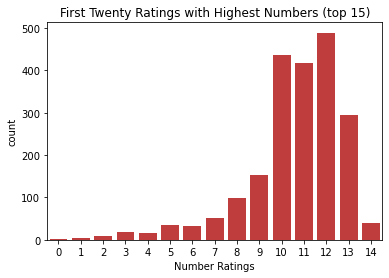

In [114]:
#count of customers by birth year
count_of_numerator = tweets_master_data.groupby(['rating_numerator'])['rating_numerator'].count().reset_index (name="count")

#sorting in descending order
sort_by_count_numerator = count_of_numerator.sort_values(by = 'count', ascending = False)

#storing x & y axises in variables
x = sort_by_count_numerator['rating_numerator'].head(15)
y = sort_by_count_numerator['count'].head(15)

#color palette
color = sb.color_palette()[3]

#bar chart showing usage distribution by user type
sb.barplot(data = sort_by_count_numerator, x = x, y = y, color = color)
plt.xlabel('Number Ratings')
plt.title('First Twenty Ratings with Highest Numbers (top 15)')
#plt.xticks(rotation = 45);